In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def read_times(hostname, result):
    tmpdict = dict()
    for datasize in ['small', 'large']:
        tmpdict[datasize] = dict()
        for intensity in range(10):
            filename = f'benchmark/times/{hostname}-data_{datasize}{intensity+1}.time'
            encoding = 'utf-16-le' if hostname == 'win' else 'utf-8'
            real = []
            user = []
            sys = []
            with open(filename, 'r', encoding=encoding) as f:
                for line in f:
                    tokens = line.split()
                    if len(tokens) == 0:
                        continue
                    real.append(float(tokens[1]))
                    user.append(float(tokens[3]))
                    sys.append(float(tokens[5]))
            real = np.array(real)
            user = np.array(user)
            sys = np.array(sys)
            tmpdict[datasize][intensity] = {
                'real': real,
                'user': user,
                'sys': sys,
                'cpu': ((user + sys) / real) * 100
            }
    result[hostname] = tmpdict
    return result

In [3]:
# Load the times
times = dict()
times = read_times('mac', times)
times = read_times('iw5', times)
times = read_times('t00', times)
times = read_times('t02', times)
times = read_times('win', times)

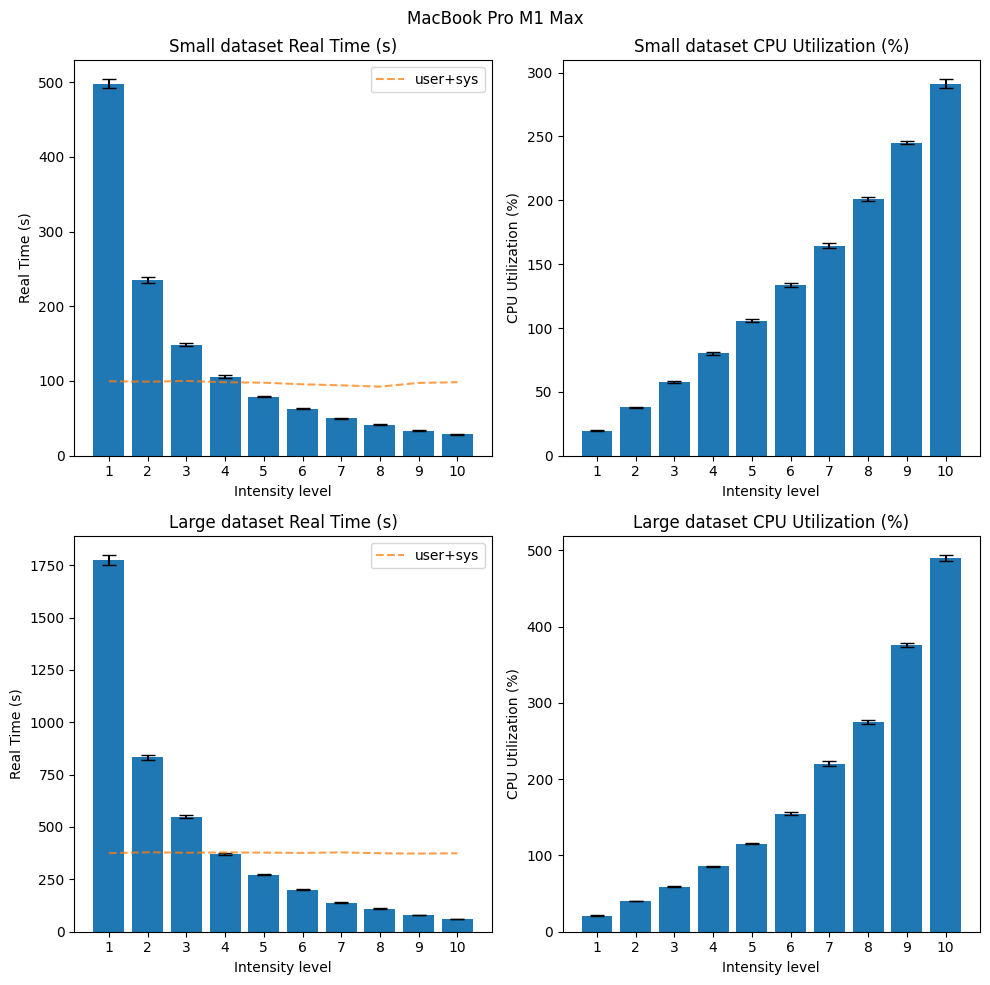

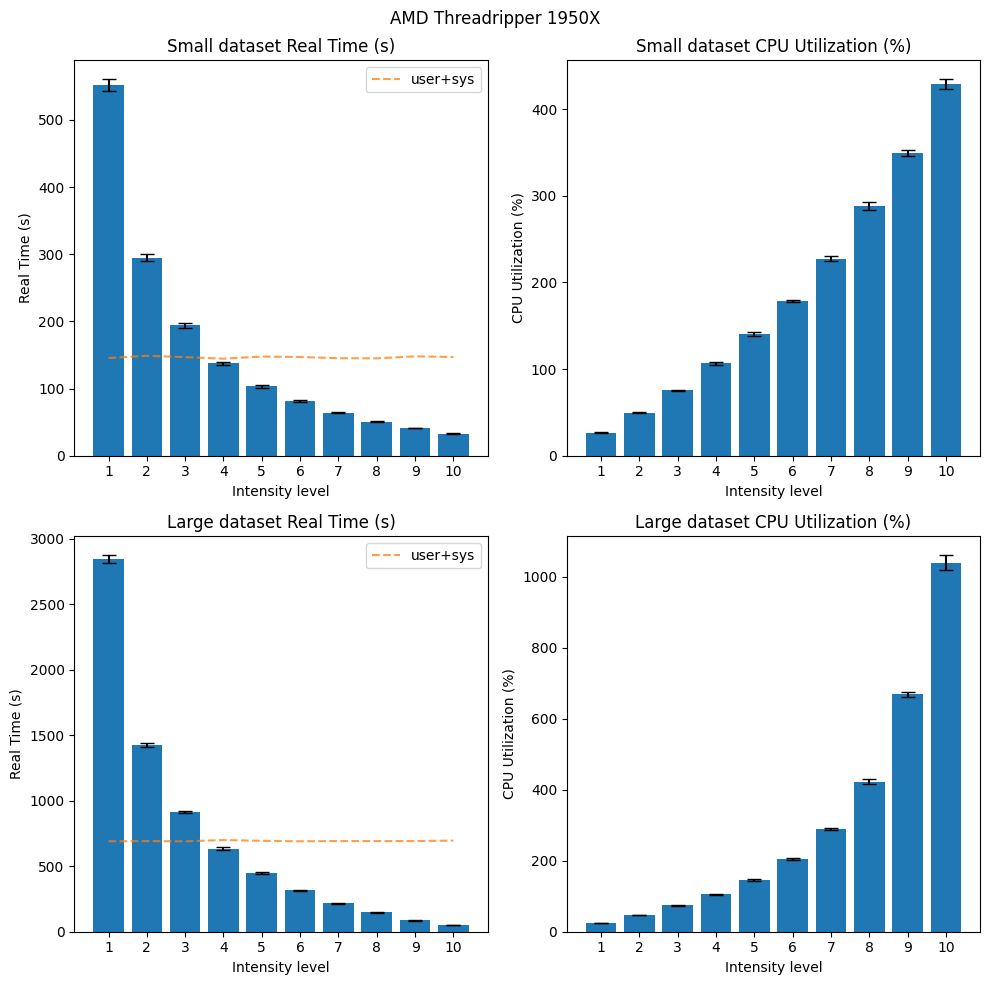

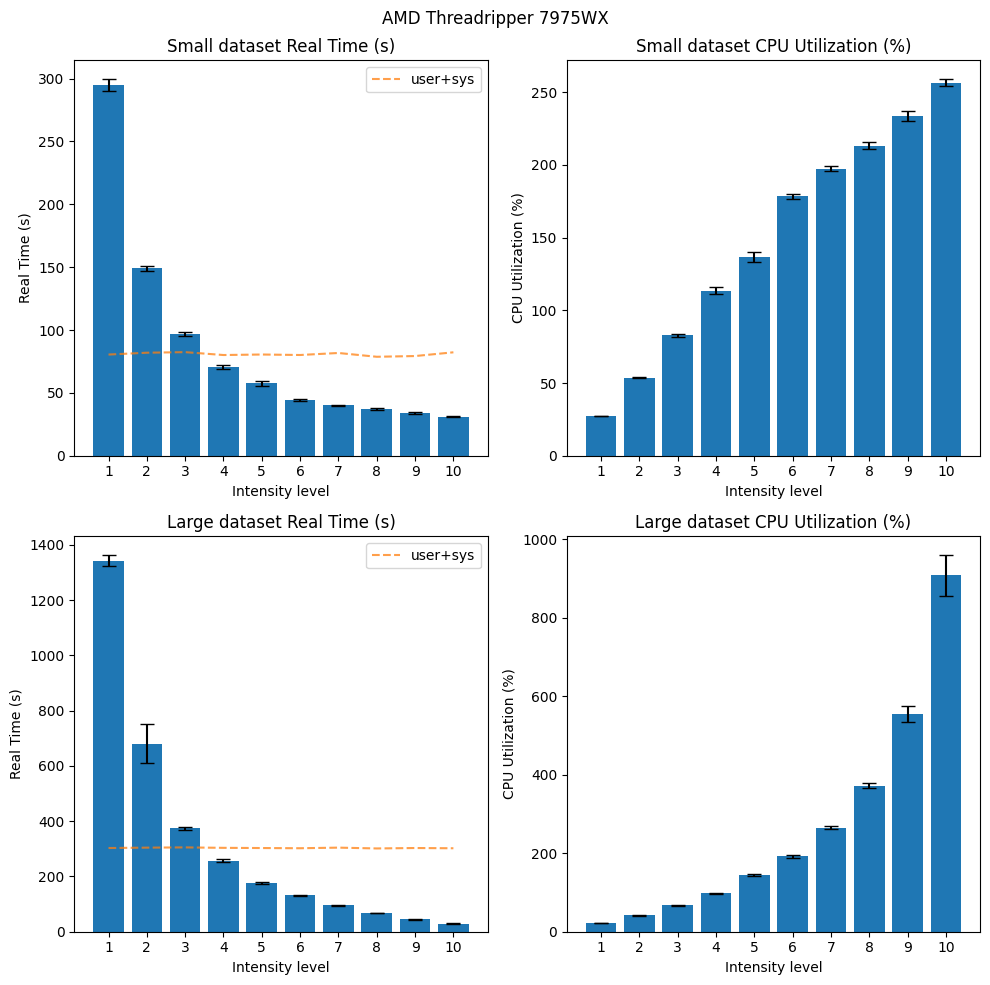

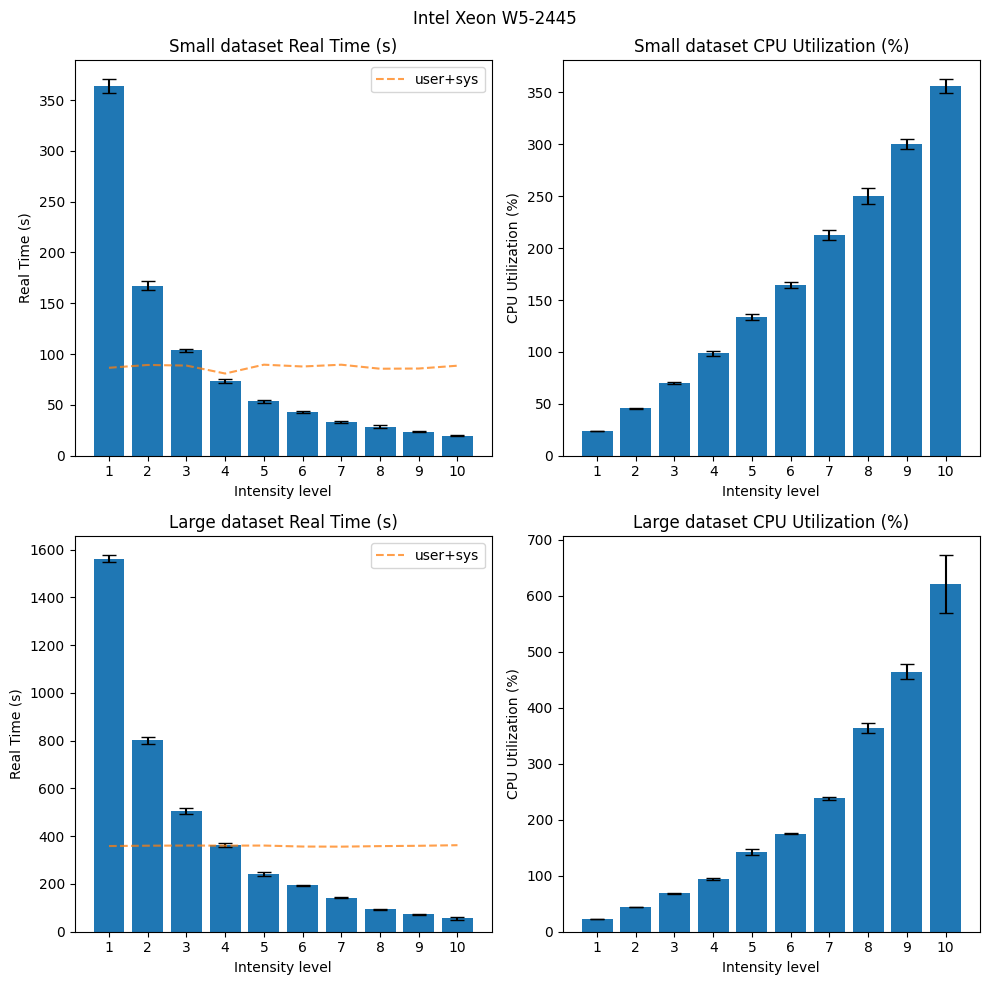

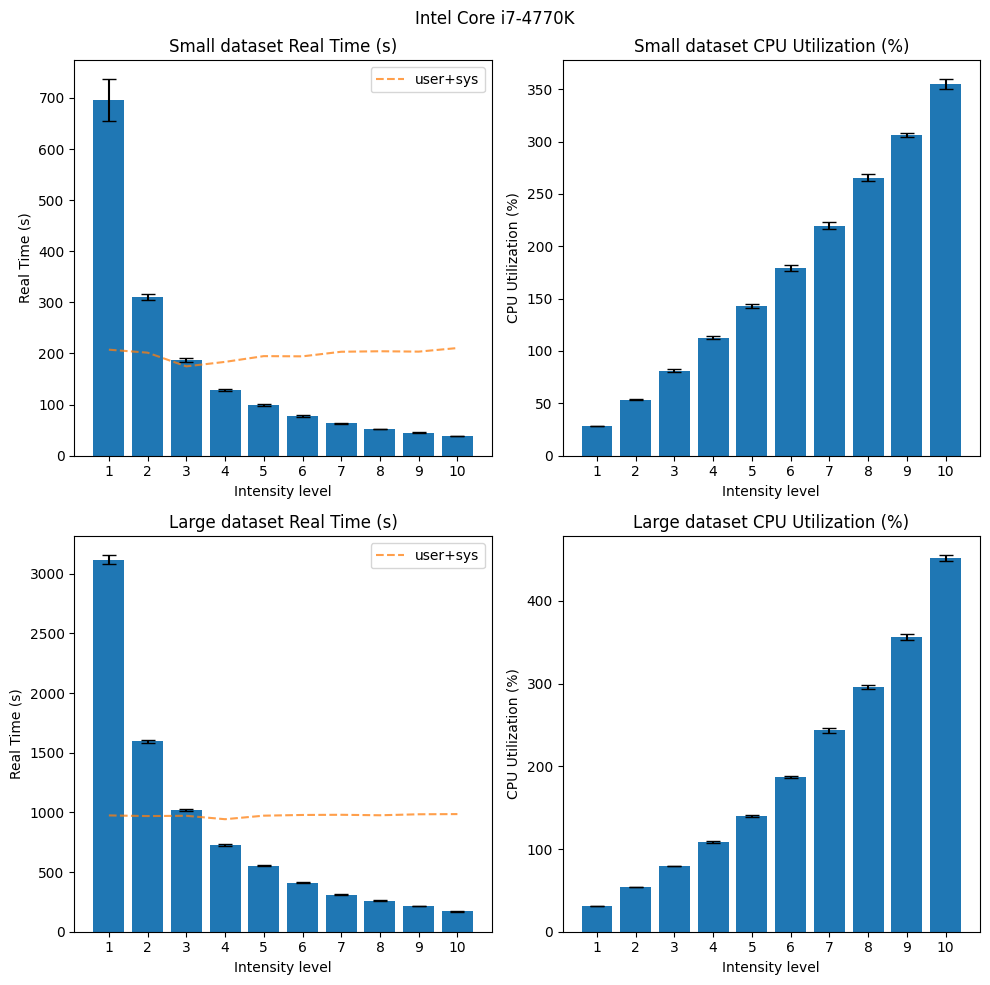

In [4]:
pretty_labels = {
    'mac': 'MacBook Pro M1 Max',
    't00': 'AMD Threadripper 1950X',
    't02': 'AMD Threadripper 7975WX',
    'iw5': 'Intel Xeon W5-2445',
    'win': 'Intel Core i7-4770K',
    'small': 'Small dataset',
    'large': 'Large dataset',
    'real': 'Real Time (s)',
    'cpu': 'CPU Utilization (%)'
}

def plot_times(times, hostname):
    # Plot four subplots, one row is datasize, one column is real, the other is cpu
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    fig.suptitle(pretty_labels[hostname])
    for i, datasize in enumerate(['small', 'large']):
        for j, metric in enumerate(['real', 'cpu']):
            ax = axs[i, j]
            ax.set_title(f'{pretty_labels[datasize]} {pretty_labels[metric]}')
            # Plot intensity as a grouped barplot with error bars
            for intensity in range(10):
                data = times[hostname][datasize][intensity][metric]
                ax.bar(intensity, np.mean(data), yerr=np.std(data), capsize=5, color='C0')
            if metric == 'real':
                ax.plot(range(10), times[hostname][datasize][0]['user'] + times[hostname][datasize][0]['sys'], color='C1', label='user+sys', linestyle='--', alpha=0.75)
                ax.legend(['user+sys'])
            ax.set_xlabel('Intensity level')
            ax.set_ylabel(pretty_labels[metric])
            ax.set_xticks(range(10))
            ax.set_xticklabels(range(1, 11))
    plt.tight_layout()
    plt.savefig(f'figures/{hostname}.png')
    plt.show()

plot_times(times, 'mac')
plot_times(times, 't00')
plot_times(times, 't02')
plot_times(times, 'iw5')
plot_times(times, 'win')